## import libs

In [1]:
import numpy as np
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
sys.path = ["C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages"] + sys.path
# from train_generator import batch_iterator, random_rotate, random_image_shift
# from utils.util import train_progressbar, slack_message
# from config import TRAIN_FILE, TEST_FILE
import os
import random
import cv2
import polarTransform
import json 

from config import *
from iterator import DataIterator

Using TensorFlow backend.


In [2]:
from utils.image_util import image_loader, resize_image, image_rotate, random_gamma, Adaptive_Histogram_Equalization, random_flip_image, normalize_img, crop_optic_disk, polartransform_image

In [3]:
import skimage
from skimage.exposure import equalize_adapthist, adjust_gamma
from skimage.transform import rescale, resize, downscale_local_mean, rotate

## Generator

In [4]:
BATCH_SIZE = 1

In [99]:
with open(os.path.join(RESULT_PATH,'train_options.json'), 'r') as f:
    copy = json.load(f)
    
augm = {"gamma":True, "rotate":False, "polar":True, "normal":False, "flip":True, "crop":False}
copy["augmemtation"].update(augm)

In [100]:
copy

{'optimizer': {'RAdam': {'lr': 0.0010000000474974513,
   'beta_1': 0.8999999761581421,
   'beta_2': 0.9990000128746033,
   'decay': 0.0,
   'weight_decay': 0.0,
   'epsilon': 1e-07,
   'amsgrad': False,
   'total_steps': 0.0,
   'warmup_proportion': 0.10000000149011612,
   'min_lr': 1.000000013351432e-10}},
 'batchsize': 1,
 'loss_function': 'binary_crossentropy',
 'input_shape': [256, 512, 3],
 'augmemtation': {'copy': True,
  'hiseq': False,
  'gamma': True,
  'rotate': False,
  'polar': True,
  'normal': False,
  'flip': True,
  'crop': False}}

In [101]:
# augm = {"gamma":False, "rotate":False, "hiseq":False, "normal":False, "flip":True
#         , "copy":True ,"crop":True}
## load batch generator
print(f"\ntrain data from : {TRAIN_DATASET}")
train_iterator = DataIterator(TRAIN_DATASET, BATCH_SIZE, INPUT_IMAGE_SHAPE, is_train=True
                              , rotate = augm['rotate'], polar = augm['polar'], gamma = augm['gamma']
                              , flip = augm['flip'], normal = augm['normal'], crop = augm['crop'])

print(f"\ntest data from : {TEST_DATASET}")
test_iterator = DataIterator(TEST_DATASET, BATCH_SIZE, INPUT_IMAGE_SHAPE
                              , is_train=False, polar= augm['polar'], normal = augm['normal'])



train data from : C:\Projects\my_Glaucoma_project_v2\dataset\train.h5

test data from : C:\Projects\my_Glaucoma_project_v2\dataset\test.h5


In [102]:
i=0

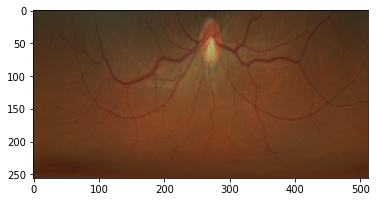

[0.]


In [126]:
item, y_true = train_iterator[i] #V0217.jpg V0127.jpg
plt.imshow(item[0])
plt.show()
print(y_true[0])
i +=1

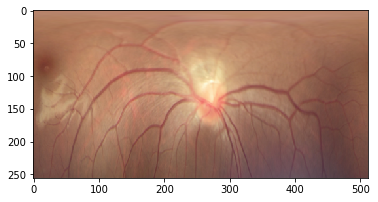

[0.]


In [55]:
item, y_true = test_iterator[i] #V0217.jpg V0127.jpg
plt.imshow(item[0])
plt.show()
print(y_true[0])
# i += 1

### unit test

In [4]:
test = 'V0317'
im = os.path.join(TRAIN_IMAGE,'Non-Glaucoma',test+'.jpg')
ma = os.path.join(MASK_LOC,'mask_'+test+'.jpg')
image =image_loader(im)
mask =image_loader(ma)

In [5]:
os.path.join(MASK_LOC,'mask_'+'n0137'+'.jpg')

'D:\\Projects\\my_Glaucoma_project_v2\\dataset\\Glaucoma\\mask_od\\mask_n0137.jpg'

In [6]:
image = resize_image(image,(512, 512, 3))

## segment generator

In [3]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
sys.path = ["C:\\Users\\infinigru\\Anaconda3\\envs\\prac\\lib\\site-packages"] + sys.path
import keras 
from seg_iterator import DataIterator
import cv2
print(cv2.__version__)
from config import *

Using TensorFlow backend.


3.4.2


In [26]:
augm = {"gamma":True, "rotate":False, "flip":True, "hiseq":False, "normal":False, "invert":False, "crop":True}

## load batch generator
print(f"\ntrain data from : {MASKING_TRAIN_IMAGE}")
train_iterator = DataIterator(TRAIN_IMAGE, MASKING_TRAIN_IMAGE, 1, IMAGE_SHAPE, is_train=True, sample = 10
                            , gamma=augm["gamma"], rotate=augm["rotate"], flip=augm["flip"]
                              , hiseq=augm["hiseq"], normal=augm["normal"], invert=augm["invert"], crop = augm["crop"])

print(f"\ntest data from : {MASKING_VAL_IMAGE}")
test_iterator = DataIterator(TRAIN_IMAGE, MASKING_VAL_IMAGE, 1, IMAGE_SHAPE, is_train=False,sample = 10
                            , hiseq=augm["hiseq"], normal=augm["normal"])


train data from : C:\Projects\my_Glaucoma_project_v2\dataset\Glaucoma\mask_od\GT\train
  [>_________________________________________________] 10 Done
test data from : C:\Projects\my_Glaucoma_project_v2\dataset\Glaucoma\mask_od\GT\val
  [>>>>>>>>>>>>>>>>>>>>>>>>>_________________________] 10 Done

In [27]:
i =0 

In [ ]:
train_iterator.on_epoch_end()

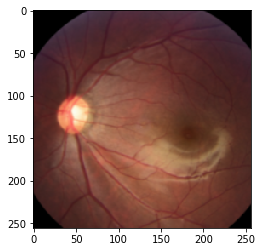

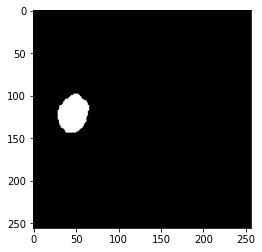

In [91]:
train_images, train_labels = train_iterator[i]
plt.imshow(train_images[0])
plt.show()
plt.imshow(train_labels[0][:,:,1].reshape(IMAGE_SHAPE[:2]), cmap='gray', vmin=0, vmax=1)
plt.show()
# i += 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


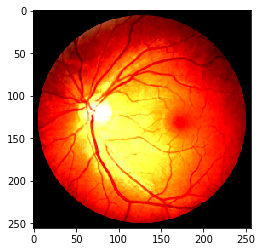

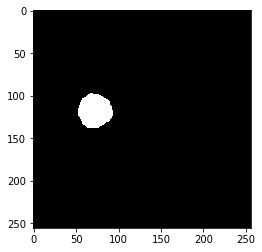

In [79]:
train_images, train_labels = test_iterator[i]
plt.imshow(train_images[0])
plt.show()
plt.imshow(train_labels[0][:,:,1].reshape(IMAGE_SHAPE[:2]), cmap='gray', vmin=0, vmax=1)
plt.show()
# i += 1